

# Week2 - Predictive Analytics project - Naive Bayes_ Part2 
### Chetan Kulkarni
## Naive Bayes on Spam/Ham for messages  

Goal of this capstone is to predict the Hotel score based on the number of reviews, useful reviews, hotel stars.

Data extraction : Data is Las Vegas Trip Advisor Dataset extracted from Kaggle/UCI data.

Describe the dataset : This dataset includes quantitative and categorical features from online reviews from 21 hotels located in Las Vegas Strip, extracted from TripAdvisor



In [146]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("/Users/chetankulkarni/Documents/Python/sms_spam.csv")

In [148]:
df.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
df.shape

(5574, 2)

In [150]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [151]:
X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

In [152]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [153]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [154]:
df.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


### This is target values

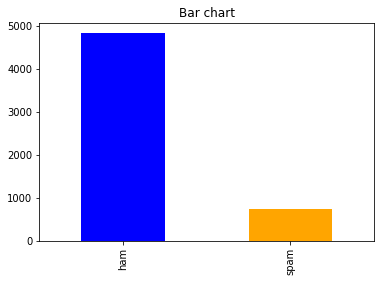

In [155]:
count_Class=pd.value_counts(df["type"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [156]:
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

Let's make a new column to detect how long the text messages are:

In [157]:
df1 = pd.DataFrame(df)
df1.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [158]:
df1['length']=df['text'].apply(len)
df1.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [159]:
df1['length'].describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

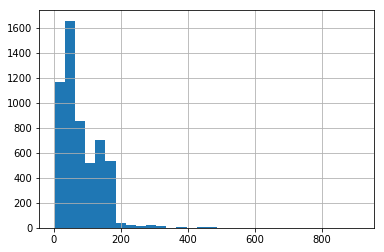

In [160]:
df1['length'].hist(bins = 30)

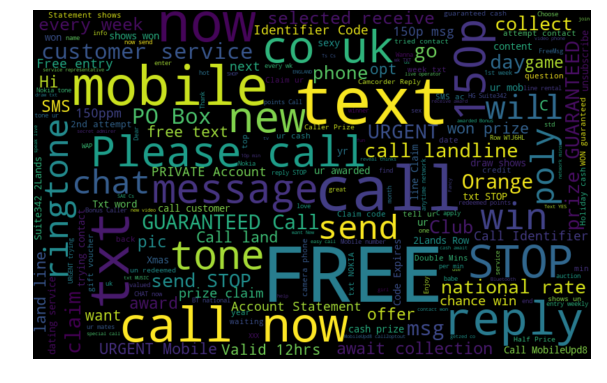

In [161]:
import wordcloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['text'][df['type'] == 'spam']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

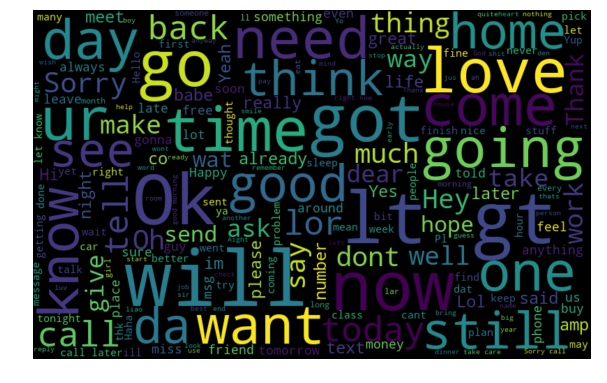

In [162]:
import wordcloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['text'][df['type'] == 'ham']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

For example:

<table border = “1“>

Message 1 Message 2 ... Message N </tr>

Word 1 Count01...0 </tr>

Word 2 Count00...0 </tr>

... 12...0 </tr>

Word N Count 01...1 </tr> </table>

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.



In [163]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)
print("Shape of sparse Matrix", X_counts.shape)

Shape of sparse Matrix (5574, 8713)


### TFIDF

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [164]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(5574, 8713)

In [165]:
X_tfidf

<5574x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

### Load Features and Targets and Split Train and Test Sets

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20)

### Fit Model

In [167]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

### Predict Metric

In [168]:
import numpy as np
y_pred = clf.predict(X_test)
np.mean(y_pred == y_test)

0.9497757847533632

### Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
False Positives (FP) – When actual class is no and predicted class is yes.
False Negatives (FN) – When actual class is yes but predicted class in no.
Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix  

In [170]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[956   0]
 [ 56 103]]
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       956
        spam       1.00      0.65      0.79       159

   micro avg       0.95      0.95      0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [171]:
x=["Please call our customer service representative"]
c = count_vect.transform(x)
c_tfidf = tfidf_transformer.transform(c)
clf.predict(c_tfidf)

array(['spam'], dtype='<U4')

In [172]:
x=["CONFIRMED, Take Your Free Gift - Cosmopolitan Magazine 1-Year Subscription"]
c = count_vect.transform(x)
c_tfidf = tfidf_transformer.transform(c)
clf.predict(c_tfidf)

array(['ham'], dtype='<U4')

## Conclusion

Naive Bayes classifier is easy to implement and provide very good result provided that our training data set is good. It can also be used to classify mood i.e. happy/sad/neutral or to classify emotions from tweets i.e. positive/negative/neutral etc.

Looking at the table, we can see that a total of only 38 + 0 = 34 of the 1115 SMS messages were incorrectly classified (3.04 percent). Among the errors were 34 out of 1115 ham messages that were misidentified as spam, and 0 of the 109 spam messages were incorrectly labeled as ham. The result is quite good. As we have not classified any spam message as Ham. This case study exemplifies the reason why Naive Bayes is the standard for text classification; directly out of the box, it performs surprisingly well.
On the other hand, the 38 legitimate messages that were incorrectly classified as spam could cause significant problems for the deployment of our filtering algorithm, because the filter could cause a person to miss an important text message. 

Further Steps: Improving model performance
1.	Use more training data, here we used 80-20 train test data, we can use more training data and could model
2.	You may have noticed that we didn't set a value for the Laplace estimator while training our model. This allows words that appeared in zero spam or zero ham messages to have an indisputable say in the classification process. 
3.	Just because the word "ringtone" only appeared in the spam messages in the training data, it does not mean that every message with this word should be classified as spam.